In [394]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [132]:
def record_deets(df, major, minor):
    if 'DocumentDate' in df:
        return df.loc[(df.Major == major) & (df.Minor == minor)].sort_values('DocumentDate')
    return df.loc[(df.Major == major) & (df.Minor == minor)]

In [59]:
def lookup(colvalue):
    return lookupdf.loc[(lookupdf.LUType == colvalue)]

---

## REAL PROPERTY SALES DATASET

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip

In [ ]:
! unzip -o ../../data/raw/"Real Property Sales.zip"

In [80]:
real_prop_sales_df = pd.read_csv('../../data/EXTR_RPSale.csv', encoding='latin-1')

/Users/oz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [145]:
real_prop_sales_df['DocumentDate'] = pd.to_datetime(real_prop_sales_df.DocumentDate)

In [588]:
real_prop_sales_2019_df = real_prop_sales_df[(real_prop_sales_df.DocumentDate > '2019') & (real_prop_sales_df.DocumentDate < '2020')]
real_prop_sales_2019_df

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
47,3028464,640331,10,2019-12-31,0,20200102000331,,,,,,,WARNER NANCY L,WARNER NANCY L+WARNER CREDIT SHELTER TRUST TODD GR,11,6,15,N,N,N,N,1,8,
56,3004740,40510,150,2019-07-12,0,20190814000349,,,,,,,GILLESPIE CAROL A+RICHARD W,GILLESPIE CAROL A+RICHARD W+ET AL,11,6,15,N,N,N,N,1,8,
78,3031504,766620,3538,2019-12-30,0,20200128000956,,,,,,,NCEP V LLC,LEMMAN PETER R+DEAN+CARVER CALLIE ANNE 215 STOCK T,3,11,15,N,N,N,N,16,2,11 18 20 31
86,3015264,124550,98,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52
215,2980836,937630,695,2019-03-28,550000,20190404001008,,,,,,,WOLFE BRUCE A+MEGAN D,ALBRECHT BRYSON+ALBRECHT STEPHEN+KATHERINE BERNDT,3,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108458,3010403,52605,9073,2019-09-10,764500,,,,,,,,NUSS STEVE M+MARIE C,MADISON MICHAEL+JILL,13,6,3,N,N,N,N,1,8,
2108462,3010631,211370,660,2019-09-05,492500,20190917001330,,,,,,,CHEMIN RACHEL+FONSECA FRANKLIN G,SHEFFELS CORBIN W+PORTINGA JOHANNA M,11,6,3,N,N,N,N,1,8,
2108463,3017023,793350,390,2019-10-22,330000,20191024001517,,,,,,,ARCHAMBEAU DAVID M+HAGEN KIM L,SAPPHIRE HOMES INC,91,6,3,N,N,N,N,1,7,
2108504,3003326,683782,410,2019-07-31,469000,20190805001220,,,,,,,HANFLING SCOTT+LYNN R,HAGAR BODHI+SOLA PHUNG,11,6,3,N,N,N,N,1,8,


In [175]:
lookup(6) # Sale instrument

,LUType,LUItem,LUDescription
1002,6,1,None
1003,6,10,Real Estate Contract
1004,6,11,Purchaser's Assignment
1005,6,13,Seller's Assignment
1006,6,15,Quit Claim Deed
1007,6,18,Trustees' Deed
1008,6,19,Executor's Deed
1009,6,2,Warranty Deed
1010,6,20,Fiduciary Deed
1011,6,21,Sheriff's Deed


In [199]:
lookup(5) # sale reason

,LUType,LUItem,LUDescription
945,5,1,None
946,5,10,Property Settlement
947,5,11,Divorce Settlement
948,5,12,Tenancy Partition
949,5,13,Community Prop Established
950,5,14,"Partial Int - love,aff,gft"
951,5,15,Easement
952,5,16,Correction (refiling)
953,5,17,Trade
954,5,18,Other


In [163]:
real_prop_sale_less_10000 = real_prop_sales_df.loc[(real_prop_sales_df.SalePrice > 0) & (real_prop_sales_df.SalePrice <= 10000)]

In [164]:
real_prop_sale_less_10000.SaleReason.value_counts()

1     6501
0     4861
18    3643
14     770
8      281
4      278
9      262
5      253
16     132
10     107
15      92
11      60
13      57
17      36
12      31
19      16
6       15
2       14
7        6
Name: SaleReason, dtype: int64

In [157]:
lookup(5)

,LUType,LUItem,LUDescription
945,5,1,None
946,5,10,Property Settlement
947,5,11,Divorce Settlement
948,5,12,Tenancy Partition
949,5,13,Community Prop Established
950,5,14,"Partial Int - love,aff,gft"
951,5,15,Easement
952,5,16,Correction (refiling)
953,5,17,Trade
954,5,18,Other


In [82]:
real_prop_sales_df.SaleReason.value_counts()

1     1242659
18     259732
5       98237
10      85581
8       78032
13      60939
9       55421
14      53378
4       52982
11      41283
16      32629
0       20335
12      12772
17       3396
6        3297
2        3294
19       2738
7        1327
15        367
3         117
Name: SaleReason, dtype: int64

looking up what the 'other' sale reason is

In [158]:
real_prop_sales_df.loc[(real_prop_sales_df.SaleReason == 18)]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,2339550,795508,170,2008-03-28,0,20080331002272,,,,,,,SCHWEIGER MICHAEL M,SCHWEIGER MICHAEL W,3,6,15,N,N,N,N,18,8,18 31 51
38,2507895,350160,125,2011-08-24,0,20110831001361,,,,,,,FEDERAL HOME LOAN MORTGAGE CORP,COLE BRIAN E,3,6,22,N,N,N,N,18,8,16 31
45,2897898,766370,622,2017-10-25,479000,20171027001566,,,,,,,SILVEIRA SUSAN-PR,ATKINSON JACOB,3,6,3,N,N,N,N,18,8,12
51,1690899,744950,5,1999-06-10,0,199906111824,012,004,744950,P,1 THRU 4,C,BACKUS L M+BACKUS M F,LAUGHLIN BETTY T+BANK OF AMERICA,3,11,15,N,N,N,N,18,2,31 45
52,1690899,744950,40,1999-06-10,0,199906111824,012,004,744950,P,1 THRU 4,C,BACKUS L M+BACKUS M F,LAUGHLIN BETTY T+BANK OF AMERICA,3,11,15,N,N,N,N,18,2,31 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108437,2451802,92105,9022,2010-06-18,0,20100727000940,,,,,,,VALLEY REGIONAL FIRE AUTHORITY,AUBURN CITY OF,1,11,27,N,N,N,N,18,1,16 31
2108447,2911646,602150,3865,2018-01-10,0,20180122000738,,,,,,,LARSEN RONALDC GENE+CATHERINE,GOLDSMITH JACQUELYNN,3,6,15,N,N,N,N,18,8,18 31 51 52
2108450,1320228,614560,2810,1993-07-14,0,199307210910,018,076,614560,P,3,23,ODEGAARD MARY J,ODEGAARD BIRGER PAUL+MARY J,3,0,15,N,N,N,N,18,8,11
2108453,1863031,305700,140,2002-01-11,0,20020116001266,,,,,,,BELM KENNETH R SR,BEHM RHONDA,3,2,15,N,N,N,N,18,3,31 51 52


In [153]:
lookup(2) #

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [154]:
real_prop_sales_df.PrincipalUse.value_counts()

6     1353719
0      322493
2      309641
11      46466
7       44775
4       12487
10      10078
9        5030
1        1762
3        1156
8         467
5         442
Name: PrincipalUse, dtype: int64

In [155]:
real_prop_sales_df.loc[(real_prop_sales_df.PrincipalUse == 0)]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
35,1328849,666902,170,1993-08-18,143000,199309021006,106,040,666902,P,17,,DIAMOND INVESTMENT CORP,ARNTZEN BUNNIE J,3,0,2,N,N,N,N,1,8,
36,1290658,885763,70,1993-01-07,54900,199301251159,025,031,885763,C,UNIT 203,A,RUSTEN RAYMOND+SARA J,HARPER BRANDON R,3,0,2,N,N,N,N,1,3,
61,695296,286790,25,1982-11-09,93000,198211120615,058,054,286790,P,05,,THORNTON TOM F+MINNIE,HAVERS MICHAEL J+KATHLEEN E,3,0,2,N,N,N,,1,8,
63,1330210,332305,9028,1993-09-07,0,199309130703,000,000,000000,,,,WATSON RICKY DONALD,WATSON RICKY DONALD+SHANNON C,3,0,15,N,N,N,N,9,8,11
69,992784,788360,3551,1988-03-25,60000,198803311342,004,087,788360,P,01-03 PT,20,PETERSON GERALD W,BOWMAN JERRY A,3,0,11,N,N,N,N,1,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108471,1245715,332775,80,1992-04-23,0,199205071441,084,039,332775,P,08,,NELSON ERIC B,NELSON SHARON E,3,0,15,N,N,N,N,9,8,11
2108474,878770,23900,512,1986-05-22,113500,198605300001,902,013,023900,U,TR 109 PT,,BLOMBERG CHARLES A+VERIAN L,COLACARRO MICHAEL A+HELEN F,3,0,2,N,N,N,N,1,8,
2108484,1324375,774050,5,1993-08-09,282000,199308111879,044,002,774050,P,1-2,9,CARNEY THOMAS R+ARVILLA N,FEINBERG MICHAEL M+MARGARET,3,0,2,N,N,N,N,1,8,
2108485,920379,381670,45,1986-12-31,46000,198612313696,051,055,381670,P,09,01,PRANGE MARILYN S,SELFRIDGE PATRICK P,1,0,2,N,N,N,N,1,7,


In [156]:
record_deets(real_prop_sales_df, 666902, 170)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
1021659,1258546,666902,170,1992-07-20,0,199207212408,106,040,666902,P,17,,AMERICAN TRUSTEE INC,DIAMOND TRUST CO,3,0,18,N,N,N,N,18,8,13
1949301,1328847,666902,170,1993-07-20,0,199309021005,106,040,666902,P,17,,COYLE THOMAS E,DIAMOND INVESTMENT CORP,3,0,18,N,N,N,N,18,8,32
35,1328849,666902,170,1993-08-18,143000,199309021006,106,040,666902,P,17,,DIAMOND INVESTMENT CORP,ARNTZEN BUNNIE J,3,0,2,N,N,N,N,1,8,
540579,2254414,666902,170,2006-12-05,325000,20061207001888,,,,,,,ARNTZEN BUNNIE J,THORLACIUS WADE+KRISTIE+CLEAVER GREGORY,3,6,3,N,N,N,N,1,8,
1431658,2877570,666902,170,2017-07-12,127398,,,,,,,,CLEAVER GREGORY+THORLACIUS KRISTIE,THORLACIUS WADE,11,6,15,N,N,N,N,18,8,18 51 52
404573,2967702,666902,170,2018-12-19,428000,20181224000541,,,,,,,THORLACIUS WADE,MCVEY CLAYTON P+RIBA NOEL K,11,6,3,N,N,N,N,1,8,


In [98]:
real_prop_sales_df.PropertyType.value_counts()[:10]

3     1549516
1      193880
2      169975
11     103201
0       43717
14      15616
4       10939
10       5143
6        4764
91       3204
Name: PropertyType, dtype: int64

In [96]:
real_prop_sales_df.Major.value_counts()

0         9361
375160    4916
276760    4393
343850    4316
510140    4172
          ... 
617330       1
530320       1
781350       1
519700       1
312108       1
Name: Major, Length: 28751, dtype: int64

In [85]:
real_prop_sales_df.Minor.value_counts()

10      37952
20      37927
30      36722
40      35665
50      33977
        ...  
1653        1
0949        1
5010        1
6880        1
7660        1
Name: Minor, Length: 11281, dtype: int64

In [86]:
real_prop_sales_df.ExciseTaxNbr.value_counts()

2639648    689
2673898    685
866727     678
2003154    274
2003168    267
          ... 
2179426      1
2181475      1
2191716      1
2193765      1
692562       1
Name: ExciseTaxNbr, Length: 1928533, dtype: int64

In [87]:
real_prop_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108516 entries, 0 to 2108515
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ExciseTaxNbr        int64 
 1   Major               object
 2   Minor               object
 3   DocumentDate        object
 4   SalePrice           int64 
 5   RecordingNbr        object
 6   Volume              object
 7   Page                object
 8   PlatNbr             object
 9   PlatType            object
 10  PlatLot             object
 11  PlatBlock           object
 12  SellerName          object
 13  BuyerName           object
 14  PropertyType        int64 
 15  PrincipalUse        int64 
 16  SaleInstrument      int64 
 17  AFForestLand        object
 18  AFCurrentUseLand    object
 19  AFNonProfitUse      object
 20  AFHistoricProperty  object
 21  SaleReason          int64 
 22  PropertyClass       int64 
 23  SaleWarning         object
dtypes: int64(7), object(17)
memory usage: 386.1+ MB


In [143]:
real_prop_sales_df_extxnbr_2639648 = real_prop_sales_df.loc[(real_prop_sales_df.ExciseTaxNbr == 2639648)]
real_prop_sales_df_extxnbr_2639648

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
165889,2639648,71908,9002,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165890,2639648,71908,9001,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165891,2639648,72009,9001,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165892,2639648,102007,9005,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
165893,2639648,102007,9015,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168404,2639648,102007,9008,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
168405,2639648,102007,9019,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
168406,2639648,102007,9016,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45
168407,2639648,102007,9012,11/05/2013,167576638,20131105001293,,,,,,,WHITE RIVER FORESTS LLC,MUCKLESHOOT FEDERAL CORPORATION,5,9,22,Y,N,N,N,1,0,27 45


In [89]:
real_prop_sales_df_extxnbr_2639648.Major.value_counts()

22007     19
61909     16
142008    16
322008    16
51909     16
          ..
131909     1
232007     1
72009      1
142107     1
162009     1
Name: Major, Length: 98, dtype: int64

---

## RESIDENTIAL BUILDING DATASET

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip

In [ ]:
! unzip -o ../../data/raw/"Residential Building.zip"

In [90]:
res_bld_df = pd.read_csv('../../data/EXTR_ResBldg.csv')

/Users/oz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [91]:
res_bld_df

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,32604,9114,1,1,3520 NE 189TH PL 98155,3520,,NE,189TH,PL,,98155,1.0,7,0,1470,0,0,0,0,0,2250,780,780,6,0,530,Y,0,0,280,5,3,0,N,3,1,1,1,0,1,0,1,1975,0,0,0,0,3,0
1,32606,9012,1,1,23422 NE 188TH ST 98077,23422,,NE,188TH,ST,,98077,2.0,8,0,1340,0,990,0,0,0,2330,0,0,0,0,710,,0,0,0,5,2,0,,3,1,0,2,1,0,0,0,1991,0,0,0,0,3,0
2,32606,9039,1,1,19800 242ND AVE NE 98077,19800,,,242ND,AVE,NE,98077,2.0,9,0,1720,0,780,0,50,0,2450,0,0,0,0,0,,180,0,0,5,3,0,,3,0,0,2,0,0,0,0,2000,0,0,0,0,3,0
3,32606,9044,1,1,18917 244TH AVE NE 98077,18917,,,244TH,AVE,NE,98077,2.0,10,0,1860,0,1830,0,0,0,3690,0,0,0,0,950,,780,0,0,5,3,0,,4,1,0,3,2,0,0,0,2002,0,0,0,0,3,0
4,32606,9045,1,1,18926 240TH AVE NE 98077,18926,,,240TH,AVE,NE,98077,1.0,4,0,740,0,0,0,0,0,740,0,0,0,0,0,,0,0,220,8,7,0,,2,0,0,1,0,0,1,0,1974,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517778,334210,2385,1,1,3315 N PARK AVE 98056,3315,,N,PARK,AVE,,98056,1.0,8,0,1480,0,0,0,0,0,2200,720,720,7,0,0,Y,0,0,0,5,2,0,,4,1,1,1,1,0,0,0,1959,0,0,0,0,5,0
517779,334210,2486,1,1,910 N 33RD PL 98056,910,,N,33RD,PL,,98056,1.0,7,0,1210,0,0,0,0,0,1780,1090,570,7,520,0,Y,60,0,300,5,3,0,,4,0,2,1,1,0,0,0,1979,0,0,0,0,4,0
517780,334210,2520,1,1,907 N 35TH ST,907,,N,35TH,ST,,NaN,2.0,10,0,1510,0,1770,0,0,0,3280,0,0,0,0,500,,100,0,30,7,2,0,,4,0,1,2,3,0,0,1,2006,0,0,0,0,3,0
517781,334210,3208,1,1,1402 N 32ND ST 98056,1402,,N,32ND,ST,,98056,1.0,7,0,1100,0,0,0,0,0,1100,0,0,0,0,580,N,30,0,0,4,3,0,,4,0,0,1,0,0,1,0,1968,0,0,0,0,4,0


In [92]:
res_bld_df.NbrLivingUnits.value_counts()

1     508908
2       7091
3       1766
4         10
10         4
7          2
9          1
8          1
Name: NbrLivingUnits, dtype: int64

In [93]:
res_bld_df.Major.value_counts()

276760    1430
510140    1427
343850    1242
537980    1099
277060     999
          ... 
284070       1
92409        1
171780       1
339540       1
885799       1
Name: Major, Length: 11619, dtype: int64

---

## PARCEL DATASET

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip

In [ ]:
! unzip -o ../../data/raw/"Parcel.zip"

In [7]:
parceldf = pd.read_csv('../../data/EXTR_Parcel.csv', encoding='latin-1')

In [94]:
parceldf

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,785662,370,Single Family Residence,SOMERSET HIGHLANDS NO. 03,37,1,5,24,15,SE,R,31.0,8.0,NaN,NaN,BELLEVUE,330,R-3.5,1,1,2,10300,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,990600,25,,ZWICKS 1ST ADD,5,1 &,3,25,13,NE,R,42.0,11.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,5000,2,2,4,0,1,0,2,0,False,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,286210,320,,GRAHAMS A B UNIVERSITY ADD,16,3,4,25,8,SE,R,44.0,6.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,2,4280,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,264800,225,duplex,FRENCHS ADD TO SLAUGHTER,6 THRU 9,2,5,21,18,NE,R,28.0,11.0,NaN,NaN,AUBURN,133,R10,6,1,3,12100,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,1,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,689181,90,,PRESTIGE HEIGHTS DIV NO 02,9,,4,26,2,SE,R,4.0,4.0,NaN,NaN,KENMORE,1442,R6,1,1,2,11554,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616105,940700,1210,,WILDERNESS RIM DIV NO. 01,121,,8,23,27,SW,R,80.0,7.0,NaN,NaN,KING COUNTY,6675,RA2.5,1,1,2,9750,2,1,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,Y,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616106,113730,210,,BROOK TRAILS ESTATES,21,,6,26,18,SW,R,72.0,4.0,NaN,NaN,KING COUNTY,7570,RA5,1,1,2,29930,2,1,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y
616107,132405,9117,,NaN,,,5,24,13,NW,R,65.0,1.0,NaN,NaN,BELLEVUE,389,R-3.5,1,1,2,20240,2,2,4,0,1,0,0,0,False,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616108,171190,142,,COLUMBIA VIEW TRACTS,1,5,4,24,21,NE,R,21.0,4.0,NaN,NaN,SEATTLE,10,SF 5000,1,1,300,3330,2,2,2,1,4,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [192]:
lookup(54)

,LUType,LUItem,LUDescription
981,54,1,UPLANDS ONLY
982,54,2,UPLANDS WITH TIDELANDS/SHORELANDS
983,54,3,TIDELANDS/SHORELANDS ONLY


In [189]:
lookup(53)

,LUType,LUItem,LUDescription
978,53,1,To Residence
979,53,2,To Waterfront
980,53,3,No Waterfront Access


In [182]:
lookup(104)

,LUType,LUItem,LUDescription
234,104,1,PRESENT USE
235,104,2,INTERIM USE
236,104,3,TEAR DOWN
237,104,4,OTHER


In [181]:
lookup(103)

,LUType,LUItem,LUDescription
213,103,1,SINGLE FAMILY
214,103,10,AMUSEMENT/ENTERTAINMENT
215,103,11,CULTURAL
216,103,12,EDUCATIONAL SERVICE
217,103,13,COMMERCIAL SERVICE
218,103,14,RETAIL/WHOLESALE
219,103,15,MANUFACTURING
220,103,16,AGRICULTURAL
221,103,17,FORESTRY
222,103,18,FISH & WILDLIFE MGMT


In [180]:
lookup(102) # present use on parcel

,LUType,LUItem,LUDescription
84,102,0,
85,102,10,Congregate Housing
86,102,101,Retail Store
87,102,104,Retail(Big Box)
88,102,105,Retail(Discount)
...,...,...,...
208,102,64,Shopping Ctr(Specialty)
209,102,7,Houseboat
210,102,8,Mobile Home
211,102,9,Single Family(C/I Use)


# ---

Checking for duplex and single family residence:

In [166]:
parceldf.PropName.value_counts()

                            528645
Single Family Residence       9070
Single Family Residence       1686
VACANT LAND                   1606
Townhouse                     1540
                             ...  
ARBOR VILLAGE - THE INN          1
ABBEY RIDGE APTS (KCHA)          1
Kirkland Terrace                 1
CHANDLERS BAY PHASE I            1
MAR-VAC                          1
Name: PropName, Length: 35237, dtype: int64

In [170]:
parcel_duplex = parceldf.loc[(parceldf.PropName == 'duplex')]

In [172]:
parcel_duplex.PropType.value_counts()

R    269
C      1
Name: PropType, dtype: int64

In [173]:
parcel_duplex

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
4406,663230,644,duplex,PARAMOUNT PARK ADD,4,12,4,26,20,NE,R,7.0,6.0,NaN,NaN,SEATTLE,25,MR (M),6,2,3,6000,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,3,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
7910,145360,1621,duplex,CEDAR PARK,7,6,4,26,21,SE,R,8.0,1.0,NaN,NaN,SEATTLE,10,LR2 (M),6,2,3,6000,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,2,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
8600,277060,3525,duplex,GILMANS ADD BLKS 01 THRU 87,20-21,26,3,25,13,SW,R,12.0,2.0,NaN,NaN,SEATTLE,10,LR3 RC (M),1,1,29,1250,2,2,4,0,1,0,0,0,False,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
13015,269410,120,duplex,GARDEN BROOK DIV NO. 02,12,,5,24,15,NW,R,31.0,7.0,NaN,NaN,BELLEVUE,330,R-10,6,1,3,11178,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,1,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
14180,12505,9179,duplex,NaN,,,5,25,1,SE,R,72.0,6.0,NaN,NaN,REDMOND,2025,R12,6,1,3,7200,2,2,3,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606379,270060,180,duplex,GARDINERS ADD TO NORTH BEND,18-19-20,2,8,23,9,NE,R,80.0,3.0,NaN,NaN,NORTH BEND,1925,DC,6,2,3,10490,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
610056,99300,260,duplex,BOULEVARD PLACE ADD,4-5,5,4,26,31,SE,R,6.0,7.0,NaN,NaN,SEATTLE,10,LR2 (M),6,2,3,5125,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,Y,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
610489,431070,1455,duplex,LICTON SPRINGS PARK ADD,5-6,8,4,26,31,NE,R,6.0,7.0,NaN,NaN,SEATTLE,10,LR3 (M),6,2,3,5000,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
615926,337510,180,duplex,HILLSIDE EAST,18,,5,25,1,SE,R,72.0,6.0,NaN,NaN,REDMOND,2025,R12,6,1,3,9200,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [174]:
record_deets(res_bld_df, 270060, 180)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
376630,270060,180,1,2,332 E 2ND ST 98045,332,,E,2ND,ST,,98045,1.0,6,0,2090,0,0,0,0,0,2090,0,0,0,0,260,N,340,0,120,1,1,0,N,5,1,1,2,0,0,0,0,1943,1959,0,0,0,3,0


# ---

In [111]:
parceldf.PropType.value_counts()

R    564657
C     44802
K      3672
T      1988
M       793
U       122
X        76
Name: PropType, dtype: int64

let's look at C, commercial.

ignore U and X for now, since they are so few.

In [ ]:
parceldf.loc[(parceldf.PropType == 'R')]

In [112]:
parceldf.loc[(parceldf.PropType == 'C')]

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
46,65600,550,MODA APTS,BELL AND DENNYS 2ND ADD,2 THRU 5,36,4,25,31,NW,C,30.0,90.0,100.0,10.0,SEATTLE,11,DMR/R 145/65,21,1,16,25440,2,2,4,0,1,0,2,0,False,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
53,112106,9050,VACANT LAND,NaN,,,6,21,11,SE,C,60.0,60.0,NaN,NaN,BLACK DIAMOND,905,CC,13,0,309,157251,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
55,95200,5770,WEST SEATTLE CHRISTIAN SCHOOL,BOSTON COMPANYS PLAT OF W S,1 THRU 11,45,3,24,14,SE,C,45.0,25.0,NaN,NaN,SEATTLE,10,LR2 (M),6,1,165,31625,2,2,4,1,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
59,927570,3430,14 UNIT APT,WEST SEATTLE L&I CO 3RD PLAT REPLAT,8 THRU 11,93,3,24,11,SE,C,45.0,10.0,100.0,235.0,SEATTLE,10,LR2 RC (M),6,1,11,8546,2,2,4,0,1,0,2,0,False,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,2,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
152,182504,9072,"STONE34 - BROOKS HQ - OTHER PARCELS 9132, 9075, 9088",NaN,,,4,25,18,SE,C,17.0,10.0,280.0,300.0,SEATTLE,10,IC-65 (M),13,1,106,17424,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616042,292613,9032,Vacant Lot (Sand Storage),NaN,,,13,26,29,SE,C,95.0,60.0,NaN,NaN,KING COUNTY,6076,F,20,0,316,11761,0,0,4,0,0,1,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616054,202104,9174,WAREHOUSE,NaN,,,4,21,20,SE,C,55.0,30.0,NaN,NaN,FEDERAL WAY,1205,CE,13,1,195,132422,2,2,4,0,2,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616084,410450,275,LEGACY CROWN POINTE BLDG B,LAKE WASHINGTON BLVD BEACH,55 &,&,5,25,17,SW,C,85.0,70.0,280.0,200.0,KIRKLAND,1701,PR 8.5,13,1,106,71190,2,2,4,0,1,1,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
616091,52203,9018,LS Cedar Inc,NaN,,,3,22,5,NW,C,47.0,30.0,NaN,NaN,KING COUNTY,4055,R1SO,1,2,195,188179,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


Looking up major 65600 and minor 550 across all dataframes

In [148]:
record_deets(real_prop_sales_df, 65600, 550)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
140178,1433543,65600,550,1995-06-15,0,199506190959,001,077,065600,P,2 THRU 5,36,IRBY JAMES S,WEST COAST PAPER PROFIT SHARING TRUST C/O DAVID A,3,0,19,N,N,N,N,4,8,23 32
1775100,1463453,65600,550,1995-12-28,1450000,199512290539,001,077,065600,P,2 THRU 5,36,WEST COAST PAPER PROFIT SHARING TR,KOH CHRISTOPHER J ET AL,3,11,3,N,N,N,N,5,2,
280007,1472838,65600,550,1996-02-23,0,199603051111,001,077,065600,P,02-05,36,KOH CHRISTOPHER J,KOH JAMES & MARIA,3,11,15,N,N,N,,14,2,32 51 52
104090,1720148,65600,550,1999-11-03,0,19991104001357,,,,,,,C D TRUST,3RD & BATTERY LLC,3,11,3,N,N,N,N,5,2,11 31
1333610,2232016,65600,550,2006-08-22,8725000,20060825001221,,,,,,,3RD & BATTERY LLC,2312 LLC,3,11,3,N,N,N,N,1,2,57
1549541,2313984,65600,550,2007-09-25,0,20071003001614,,,,,,,2312 LLC,SEATTLE CITY OF,1,11,27,N,N,N,N,18,1,16 31
1995467,2496100,65600,550,2011-06-15,49424700,20110615001679,,,,,,,2312 LLC,EQR-MODA I LLC+EQR-MODA II LLC,3,7,4,N,N,N,N,1,2,


In [135]:
record_deets(res_bld_df, 65600, 550)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost


In [136]:
record_deets(parceldf, major, minor)

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
46,65600,550,MODA APTS,BELL AND DENNYS 2ND ADD,2 THRU 5,36,4,25,31,NW,C,30.0,90.0,100.0,10.0,SEATTLE,11,DMR/R 145/65,21,1,16,25440,2,2,4,0,1,0,2,0,False,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


---

## LOOKUP TABLE

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip

In [ ]:
! unzip -o ../../data/raw/"Lookup.zip"

In [9]:
lookupdf = pd.read_csv('../../data/EXTR_LookUp.csv')

In [26]:
lookupdf

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."
...,...,...,...
1203,99,1,SUBSTANDARD ...
1204,99,2,BELOW AVERAGE ...
1205,99,3,AVERAGE ...
1206,99,4,ABOVE AVERAGE ...


---

# MERGING TABLES

In [589]:
rps_parcel_dfmerge = pd.merge(real_prop_sales_2019_df, parceldf, how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])

In [590]:
rps_parcel_resbldg_dfmerge = pd.merge(rps_parcel_dfmerge, res_bld_df, how='left', left_on=['Major', 'Minor'], right_on=['Major','Minor'])

In [595]:
cols = list(rps_parcel_resbldg_dfmerge.columns)
cols = [cols[4]] + cols[:4] + cols[5:]
rps_parcel_resbldg_dfmerge = rps_parcel_resbldg_dfmerge[cols]

In [604]:
rps_parcel_resbldg_dfmerge = rps_parcel_resbldg_dfmerge[(rps_parcel_resbldg_dfmerge.SalePrice > 0)]
rps_parcel_resbldg_dfmerge.SalePrice.dropna(inplace=True)

In [605]:
rps_parcel_resbldg_dfmerge

,SalePrice,ExciseTaxNbr,Major,Minor,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
3,193000,3015264,124550,98,2019-09-27,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,,BURKE-FARRARS KIRKLAND DIV NO. 29,18-19-20,144,5.0,26.0,31.0,SE,R,74.0,8.0,NaN,NaN,KIRKLAND,1701.0,RS 7.2,1.0,1.0,2.0,9670.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,1.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,9823 FORBES CREEK DR 98033,9823,,,FORBES CREEK,DR,,98033,1.0,7.0,0.0,1140.0,0.0,0.0,0.0,0.0,0.0,1760.0,1030.0,620.0,6.0,410.0,100.0,,0.0,0.0,220.0,5.0,2.0,0.0,,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,3.0,0.0
4,550000,2980836,937630,695,2019-03-28,20190404001008,,,,,,,WOLFE BRUCE A+MEGAN D,ALBRECHT BRYSON+ALBRECHT STEPHEN+KATHERINE BERNDT,3,6,3,N,N,N,N,1,8,,,WHITMAN THE ADD TO BALLARD,43,3,3.0,25.0,1.0,NW,R,82.0,11.0,NaN,NaN,SEATTLE,10.0,RSL (M),1.0,1.0,2.0,2500.0,2.0,2.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,8013 11TH AVE NW 98117,8013,,,11TH,AVE,NW,98117,3.0,8.0,0.0,370.0,0.0,540.0,650.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,240.0,N,0.0,0.0,200.0,4.0,3.0,0.0,N,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1985.0,0.0,0.0,0.0,0.0,3.0,0.0
7,648500,2982060,347050,40,2019-04-04,,,,,,,,BROWN MARK E+MARCIE K,MEDVED ROBERT J+JENNIFER E,11,6,3,N,N,N,N,1,8,,,HOTSON ESTATES,4,,6.0,22.0,27.0,NW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813.0,R-4,1.0,1.0,2.0,5250.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,26034 231ST PL SE,26034,,,231ST,PL,SE,NaN,2.0,8.0,0.0,1390.0,0.0,1910.0,0.0,0.0,0.0,3300.0,0.0,0.0,0.0,0.0,590.0,,0.0,0.0,0.0,5.0,2.0,0.0,,5.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2005.0,0.0,0.0,0.0,0.0,3.0,6000.0
8,1445000,3003196,188780,340,2019-07-23,20190802001114,,,,,,,MAINVUE WA LLC,PANDEY ASEEM+MAMTA,10,6,3,N,

In [619]:
#checking values of water front footage
rps_parcel_resbldg_dfmerge.WfntFootage.value_counts()

0.0       32476
50.0         71
5300.0       63
60.0         52
100.0        40
          ...  
153.0         1
27.0          1
1610.0        1
450.0         1
360.0         1
Name: WfntFootage, Length: 147, dtype: int64

In [625]:
all_merged_2019_wfntfootage = rps_parcel_resbldg_dfmerge[(rps_parcel_resbldg_dfmerge.WfntFootage > 0)]
all_merged_2019_wfntfootage

,SalePrice,ExciseTaxNbr,Major,Minor,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
356,565000,3025185,412700,625,2019-12-11,20191212001217,,,,,,,LENTZ SHEILA,DOLLEMAN WILLIAM H,3,6,3,N,N,N,N,1,8,,,LAKE WILDERNESS SHORE ACRES,25,8,6.0,22.0,27.0,NW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813.0,R-4,1.0,1.0,2.0,9933.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,40.0,3.0,0.0,2.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,22844 SE LAKE WILDERNESS DR S 98038,22844,,SE,LAKE WILDERNESS,DR,S,98038,1.0,5.0,0.0,740.0,0.0,0.0,0.0,0.0,0.0,740.0,600.0,0.0,0.0,0.0,0.0,,0.0,0.0,290.0,4.0,3.0,0.0,,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1950.0,0.0,0.0,0.0,0.0,4.0,0.0
425,280000,3009930,217200,195,2019-09-09,20190912001662,,,,,,,REID ROSE HATSUMI,CLEAR VISION INVESTMENTS INC,11,6,3,N,N,N,N,1,8,,,EAST RIVERTON GARDEN TRS 2ND,38-39,,4.0,23.0,14.0,NW,R,24.0,5.0,NaN,NaN,TUKWILA,2408.0,LDR,1.0,1.0,2.0,16300.0,2.0,1.0,4.0,0.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,75.0,1.0,0.0,0.0,N,N,0.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,13336 56TH AVE S 98178,13336,,,56TH,AVE,S,98178,1.0,7.0,0.0,1040.0,0.0,0.0,0.0,0.0,0.0,1040.0,0.0,0.0,0.0,0.0,0.0,N,0.0,0.0,300.0,4.0,3.0,10.0,N,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1961.0,0.0,0.0,0.0,0.0,3.0,0.0
444,7800000,2994641,950220,5,2019-06-12,20190620000216,,,,,,,CHANG DAVID HWA-YUAN+PILIN,DAHER MOHAMAD O+DAYANA,11,6,3,N,N,N,N,1,8,,,WOLFES HOME TRS,1-2,,5.0,24.0,8.0,NW,R,92.0,10.0,NaN,NaN,BELLEVUE,330.0,R-1.8,1.0,1.0,2.0,25141.0,2.0,2.0,4.0,1.0,1.0,0.0,2.0,0.0,False,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,110.0,1.0,0.0,0.0,N,N,2.0,0.0,0.0,0.0,N,N,0.0,0.0,N,N,N,0.0,0.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1.0,1.0,10015 SE 25TH ST 98004,10015,,SE,25TH,ST,,98004,2.0,12.0,0.0,3340.0,0.0,2320.0,0.0,0.0,0.0,6990.0,2830.0,1330.0,11.0,0.0,1300.0,,1060.0,0.0,410.0,5.0,2.0,0.0,,5.0,2.0,1.0,3.0,3.0,0.0,0.0,0.0,2009.0,0.0,0.0,0.0,0.0,3.0,0.0
539,5498800,2994154,606530,480,2019-06-13,20190617001585,,,,,,,POINT GUARD LLC,BOLAM CYNTHIA+A

In [606]:
rps_parcel_resbldg_dfmerge.SalePrice.isna().sum()

0

# Will looked at cols with corr >0.1 with sale price

In [599]:
initial_corr_cols = rps_parcel_resbldg_dfmerge[['SalePrice','PropertyType',
 'PrincipalUse',
 'SaleReason',
 'PropertyClass',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'LevyCode',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'TidelandShoreland',
 'LotDepthFactor',
 'TrafficNoise',
 'AirportNoise',
 'CurrentUseDesignation',
 'BldgNbr',
 'NbrLivingUnits',
 'Stories',
 'BldgGrade',
 'SqFt1stFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinHalf',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'FinBasementGrade',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'SqFtOpenPorch',
 'SqFtDeck',
 'HeatSystem',
 'HeatSource',
 'BrickStone',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'FpSingleStory',
 'FpMultiStory',
 'FpFreestanding',
 'FpAdditional',
 'YrBuilt',
 'YrRenovated',
 'PcntComplete',
 'Obsolescence',
 'Condition',
 'AddnlCost']]



In [607]:
rps_parcel_resbldg_dfmerge.corr()

,SalePrice,ExciseTaxNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,Range,Township,Section,Area,SubArea,SpecArea,SpecSubArea,LevyCode,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,NbrBldgSites,Contamination,HistoricSite,CurrentUseDesignation,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
SalePrice,1.000000,0.028471,-0.031823,0.039713,0.156510,0.089425,-0.136499,-0.010100,0.046571,0.023836,0.007243,0.271085,0.105222,-0.014238,-0.048207,0.294948,0.010682,0.088009,0.001063,0.011234,0.028273,0.002691,-0.000031,-0.028714,0.053191,0.058555,0.042505,0.000125,0.004971,-0.000417,0.000262,0.014122,-0.000565,0.012085,0.002424,0.001871,-0.001102,-0.000514,-0.006247,-0.004412,-0.003123,-0.003225,0.010200,0.003988,-0.024343,0.010207,-0.001807,0.021792,0.080835,0.003551,0.121319,0.007495,0.168331,0.348814,0.156510,0.209758,0.038491,0.232065,0.037062,-0.000098,-0.001852,0.343687,0.136059,0.141522,0.122367,0.030557,0.096852,0.189197,0.035477,0.094401,0.048195,-0.004061,0.039901,0.145435,0.159894,0.136486,0.180658,0.076425,0.080427,0.016942,0.057689,0.096234,0.045148,0.038063,-0.011659,-0.004754,-0.057772,0.095456
ExciseTaxNbr,0.028471,1.000000,-0.104690,0.024514,0.034915,0.057587,-0.013337,0.015827,-0.010317,0.004237,-0.000623,0.042854,-0.012954,0.135579,0.029071,0.042733,-0.012571,0.026771,0.048840,-0.026175,-0.015205,-0.017783,0.014387,-0.007487,0.014465,0.009906,0.000345,-0.010003,0.004411,-0.003164,0.002606,0.007369,0.009359,-0.000507,0.002304,0.010107,-0.002934,0.018549,0.045617,0.023847,0.015804,0.002901,0.002616,0.027142,-0.006872,0.005658,-0.003048,0.015468,0.000932,0.002924,0.046870,0.001981,-0.003156,-0.011364,-0.008722,-0.002302,0.008872,0.000733,-0.008118,-0.006993,-0.000524,-0.001353,0.004872,-0.003090,-0.005656,0.004934,-0.009716,-0.001786,0.000773,-0.004729,-0.020298,-0.010480,0.014405,-0.017273,0.003110,-0.006943,-0.010489,-0.015262,0.012442,0.008660,0.002876,-0.014366,-0.007403,0.018029,0.026402,-0.005241,-0.021449,0.003951
PropertyType,-0.031823,-0.104690,1.000000,0.104163,-0.136478,-0.176962,0.060971,0.016530,0.002989,-0.000209,0.012385,0.003196,0.034907,-0.012582,0.044299,0.020377,-0.085819,0.143575,-0.028971,-0.077925,-0.083954,-0.029896,0.050327,0.026244,0.023603,-0.004063,-0.008719,0.011059,-0.004692,0.019254,0.006633,0.001005,-0.004235,-0.001194,0.007371,0.002977,0.003456,-0.002707,-0.031030,-0.008023,0.007830,0.002449,-0.008855,-0.009497,0.008183,0.000063,0.007154,-0.004174,-0.008825,0.028027,-0.059497,0.048259,0.000896,0.035309,-0.001618,0.025744,0.001067,0.000914,-0.001807,-0.009728,0.006490,0.018834,0.011871,0.010372,0.007993,0.019960,0.029207,0.023289,-0.005234,0.013432,0.021682,0.011888,-0.011060,0.014542,0.014226,0.006868,0.020391,0.017912,-0.003748,0.002205,-0.006694,0.012167,-0.000006,0.055584,-0.003420,-0.002927,0.018683,0.002408
PrincipalUse,0.039713,0.024514,0.104163,1.000000,0.075982,0.053507,0.681768,-0.046935,-0.013014,-0.003863,0.008351,0.467962,-0.029991,-0.036741,-0.057151,0.589546,0.060836,0.264388,0.005314,0.017820,0.044392,0.015698,-0.011266,-0.082754,0.115610,0.108618,0.109734,0.003517,-0.014249,-0.015263,-0.031871,-0.001681,-0.016654,-0.020542,-0.010002,-0.005825,-0.008832,-0

In [612]:
len(['SalePrice','SaleInstrument','SubArea','SpecArea','HBUAsIfVacant','BldgNbr','Stories','BldgGrade','BldgGradeVar','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving',
 'SqFtTotBasement','SqFtFinBasement','FinBasementGrade','SqFtOpenPorch','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount'])

20

In [610]:
test_w_corr_matrix_df = rps_parcel_resbldg_dfmerge[['SalePrice','SaleInstrument','SubArea','SpecArea','HBUAsIfVacant','BldgNbr','Stories','BldgGrade','BldgGradeVar','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving',
 'SqFtTotBasement','SqFtFinBasement','FinBasementGrade','SqFtOpenPorch','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount']]
test_w_corr_matrix_df

,SalePrice,SaleInstrument,SubArea,SpecArea,HBUAsIfVacant,BldgNbr,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtOpenPorch,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount
3,193000,15,8.0,NaN,1.0,1.0,1.0,7.0,0.0,1140.0,0.0,1760.0,1030.0,620.0,6.0,0.0,3.0,0.0,1.0,1.0
4,550000,3,11.0,NaN,1.0,1.0,3.0,8.0,0.0,370.0,540.0,1560.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0
7,648500,3,3.0,NaN,1.0,1.0,2.0,8.0,0.0,1390.0,1910.0,3300.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,2.0
8,1445000,3,5.0,NaN,1.0,1.0,2.0,9.0,0.0,2150.0,2770.0,4920.0,0.0,0.0,0.0,300.0,5.0,2.0,1.0,3.0
10,785000,3,1.0,NaN,1.0,1.0,2.0,8.0,0.0,580.0,610.0,1540.0,560.0,350.0,8.0,0.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62140,764500,3,4.0,NaN,1.0,1.0,1.0,8.0,0.0,1740.0,0.0,2900.0,1160.0,1160.0,7.0,230.0,4.0,1.0,0.0,1.0
62141,492500,3,8.0,NaN,1.0,1.0,1.0,6.0,0.0,720.0,0.0,1220.0,720.0,500.0,6.0,0.0,3.0,0.0,1.0,1.0
62142,330000,3,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62143,469000,3,18.0,NaN,1.0,1.0,2.0,9.0,0.0,1240.0,1180.0,2420.0,0.0,0.0,0.0,40.0,4.0,1.0,0.0,2.0


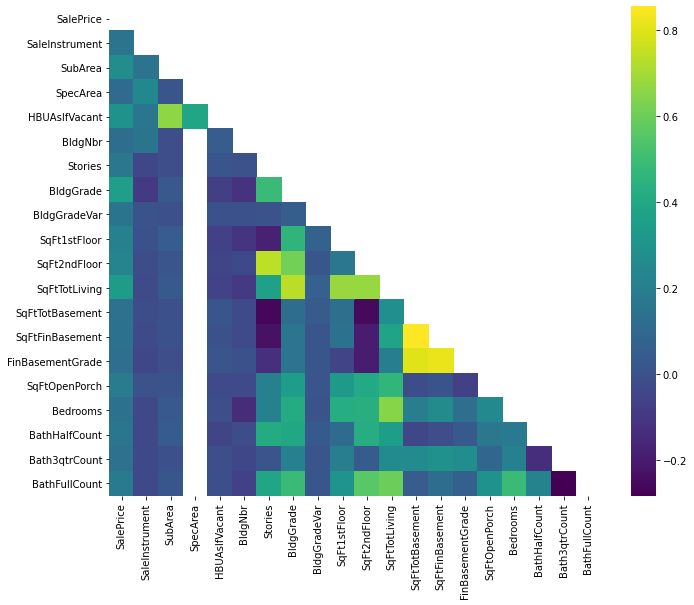

In [611]:
corr = test_w_corr_matrix_df.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");


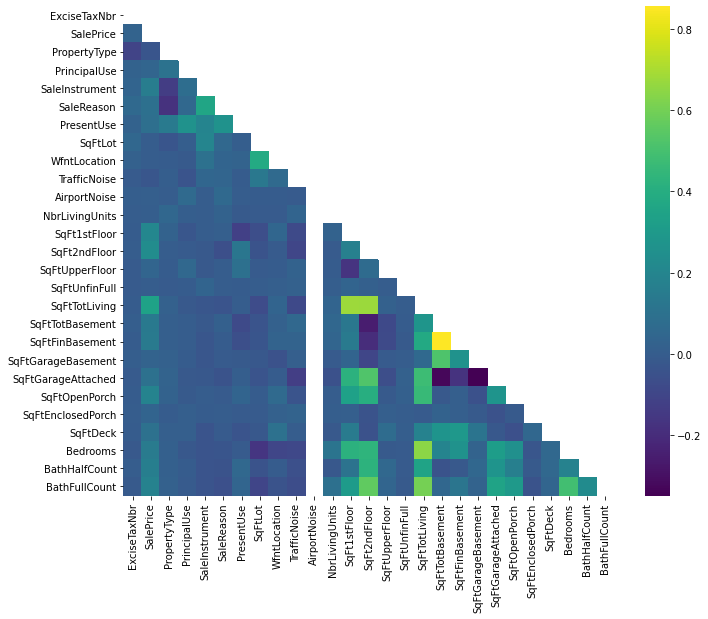

In [614]:
corr = all_merge.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [613]:
all_merge = rps_parcel_resbldg_dfmerge[['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFHistoricProperty',
 'SaleReason',
 'PropName',
 'PropType',
 'PresentUse',
 'SqFtLot',
 'WfntLocation',
 'TrafficNoise',
 'AirportNoise',
 'PowerLines',
 'OtherNuisances',
 'NbrLivingUnits',
 'ZipCode',
 'SqFt1stFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinFull',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'Bedrooms',
 'BathHalfCount',
 'BathFullCount']]

In [372]:
all_sales_2019_merged = all_merge[(all_merge.SalePrice > 0) & (all_merge.DocumentDate > '2019') & (all_merge.DocumentDate < '2020')].sort_values("DocumentDate")
all_sales_2019_merged

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
866177,2970149,413210,180,2019-01-02,749000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
11186,2974525,287710,3940,2019-01-02,1100000,3,7,3,N,1,PHINNEY RIDGE PROFESSIONAL CENTER,C,9.0,3413.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0
962198,3029568,236300,0520,2019-12-31,580000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701743,3028369,388380,51,2019-12-31,669000,2,6,3,N,1,,R,2.0,9041.0,0.0,0.0,0.0,N,N,1.0,NaN,1450.0,0.0,0.0,0.0,2380.0,1440.0,930.0,510.0,0.0,40.0,0.0,100.0,5.0,0.0,3.0


---

## EXPLORATORY DATA ANALYSIS

In [216]:
print(f'real property sales records: {len(real_prop_sales_df)}')
print(f'real property sales records with sales greater than 0: {len(real_prop_sales_df[(real_prop_sales_df.SalePrice > 0)])}')
print(f'residential buidling records: {len(res_bld_df)}')
print(f'parcel records: {len(parceldf)}')

real property sales records: 2108516
real property sales records with sales greater than 0: 1380291
residential buidling records: 517783
parcel records: 616110


# ---

### CLEANING FINAL DATAFRAME (all_sales_2019_merged)

---

#### Investigating and cleaning Tot living sq ft

In [373]:
all_sales_2019_merged

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
866177,2970149,413210,180,2019-01-02,749000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
11186,2974525,287710,3940,2019-01-02,1100000,3,7,3,N,1,PHINNEY RIDGE PROFESSIONAL CENTER,C,9.0,3413.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0
962198,3029568,236300,0520,2019-12-31,580000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701743,3028369,388380,51,2019-12-31,669000,2,6,3,N,1,,R,2.0,9041.0,0.0,0.0,0.0,N,N,1.0,NaN,1450.0,0.0,0.0,0.0,2380.0,1440.0,930.0,510.0,0.0,40.0,0.0,100.0,5.0,0.0,3.0


In [383]:
all_sales_2019_merged.SqFtTotLiving.isna().sum()/len(all_sales_2019_merged)

0.3078471778109382

looking at rows with NaNs in SqFtTotLiving column

In [375]:
all_sales_2019_merged[all_sales_2019_merged['SqFtTotLiving'].isnull()]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
866177,2970149,413210,180,2019-01-02,749000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11186,2974525,287710,3940,2019-01-02,1100000,3,7,3,N,1,PHINNEY RIDGE PROFESSIONAL CENTER,C,9.0,3413.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983712,2969432,152204,9115,2019-01-02,200000,11,6,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965274,2969813,083800,0125,2019-01-02,579000,11,6,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681787,2969651,276770,990,2019-01-02,5073800,59,7,3,N,1,Ballard Court Apartment,C,16.0,4750.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163944,3028280,857600,1060,2019-12-31,8555000,1,6,3,N,1,NaN,R,300.0,26136.0,0.0,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35683,3028711,270315,70,2019-12-31,387500,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322291,3029531,860312,130,2019-12-31,395000,14,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962198,3029568,236300,0520,2019-12-31,580000,3,2,3,N,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These rows don't have any data on residential building dataframe. But they do exist in the real prop sales and parcel dataframes.\
So we can use these rows for goal 3 and 6.\
Create new dataframe with these rows removed, and use it for goals 

In [376]:
all_totliving_sqft = all_sales_2019_merged.dropna(subset=['SqFtTotLiving'])

In [377]:
all_totliving_sqft

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775739,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,1980.0,0.0,0.0,0.0,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
775738,3030053,162507,9011,2019-12-31,2400000,3,6,3,N,1,,R,3.0,1644825.0,9.0,0.0,0.0,N,N,1.0,98014,900.0,0.0,0.0,0.0,1260.0,0.0,0.0,0.0,0.0,60.0,80.0,0.0,3.0,0.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


In [369]:
all_totliving_sqft.SqFtTotLiving.isna().sum()

0

In [370]:
len(all_totliving_sqft[all_totliving_sqft.SqFtTotLiving == 0])

0

---

#### Creating middle class (50,000 < SalePrice < 2,000,000), and total sq ft > 500

In [537]:
middle_class = all_totliving_sqft[(all_totliving_sqft.SalePrice > 50000) & (all_totliving_sqft.SalePrice < 2000000) & 
                                  (all_totliving_sqft.SqFtTotLiving > 500)]

In [538]:
middle_class

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688437,3029386,247335,830,2019-12-31,627000,11,6,3,N,1,,R,2.0,10425.0,0.0,0.0,0.0,N,N,1.0,98058,2530.0,0.0,0.0,0.0,3820.0,0.0,0.0,0.0,420.0,80.0,0.0,0.0,5.0,1.0,1.0
1079169,3029102,712830,190,2019-12-31,346629,3,6,27,N,4,,R,2.0,3000.0,0.0,1.0,0.0,N,N,1.0,98144,780.0,0.0,0.0,0.0,1280.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4.0,1.0,1.0
906528,3028669,232202,9137,2019-12-31,60000,0,6,26,N,1,,R,2.0,508958.0,0.0,0.0,0.0,N,N,1.0,98070,875.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,1.0,0.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6007d90d0>]],
      dtype=object)

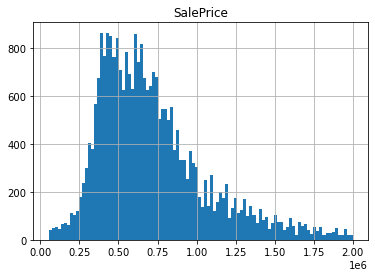

In [539]:
middle_class.hist(column='SalePrice', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6038e8b20>]],
      dtype=object)

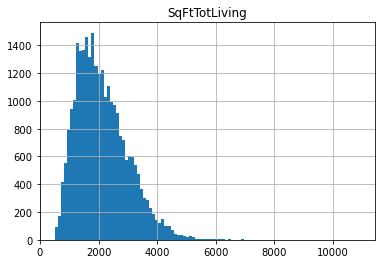

In [540]:
middle_class.hist(column='SqFtTotLiving', bins=100)

---

#### PROPERTY TYPE & PRINCIPAL USE (RPS)

In [541]:
middle_class.PropertyType.value_counts()

11    15877
3      8622
2      1496
10     1073
1       211
12       98
14       82
91       63
0        55
5        30
18       12
4         7
13        7
6         6
99        5
96        4
83        3
59        2
65        2
23        1
94        1
Name: PropertyType, dtype: int64

In [542]:
middle_class.PropertyType.value_counts(normalize=True)[:5]

11    0.574068
3     0.311747
2     0.054091
10    0.038797
1     0.007629
Name: PropertyType, dtype: float64

In [543]:
lookup(1) # Property type, rps

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY
1,1,10,Land with new building
2,1,11,"Household, single family units"
3,1,12,"Multiple family residence (Residential, 2-4 units)"
4,1,13,"Multiple family residence (Residential, 5+ units)"
...,...,...,...
79,1,93,Water areas
80,1,94,Open space land classified under chapter 84.34 RCW
81,1,95,Timberland classified under chapter 84.34 RCW
82,1,96,Improvements on leased land


Use property type (rps):
- 11- 57%: household, single family units
- 3- 31%: land with prev used bldg
- 2- 5%: land with new building
- 10- 3%: land with new building

In [544]:
middle_class_filtered = middle_class[(middle_class.PropertyType == 11) | (middle_class.PropertyType == 3) | (middle_class.PropertyType == 2) | 
                           (middle_class.PropertyType == 10)]

In [545]:
middle_class_filtered.PropertyType.value_counts()

11    15877
3      8622
2      1496
10     1073
Name: PropertyType, dtype: int64

In [546]:
# Principal Use (rps)

middle_class.PrincipalUse.value_counts(normalize=False)

6     27626
7        26
2         3
10        1
3         1
Name: PrincipalUse, dtype: int64

In [547]:
lookup(2) # Principal use

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [548]:
middle_class_filtered = middle_class_filtered[(middle_class_filtered.PrincipalUse == 6)]
middle_class_filtered

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495665,3029078,94500,570,2019-12-31,1150000,11,6,3,N,1,,R,2.0,4650.0,0.0,0.0,0.0,N,Y,1.0,NaN,1230.0,980.0,0.0,0.0,2820.0,610.0,610.0,0.0,0.0,0.0,0.0,220.0,4.0,1.0,2.0
1688437,3029386,247335,830,2019-12-31,627000,11,6,3,N,1,,R,2.0,10425.0,0.0,0.0,0.0,N,N,1.0,98058,2530.0,0.0,0.0,0.0,3820.0,0.0,0.0,0.0,420.0,80.0,0.0,0.0,5.0,1.0,1.0
1079169,3029102,712830,190,2019-12-31,346629,3,6,27,N,4,,R,2.0,3000.0,0.0,1.0,0.0,N,N,1.0,98144,780.0,0.0,0.0,0.0,1280.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4.0,1.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


In [549]:
middle_class_filtered.PrincipalUse.value_counts()

6    27045
Name: PrincipalUse, dtype: int64

# ---

#### PRESENT USE (parcel)

In [550]:
middle_class_filtered.PresentUse.value_counts()

2.0      23804
29.0      2585
3.0        206
300.0      195
6.0        185
4.0         46
57.0        10
301.0        8
8.0          4
341.0        1
272.0        1
Name: PresentUse, dtype: int64

In [551]:
middle_class_filtered.PresentUse.value_counts(normalize=True)

2.0      0.880163
29.0     0.095581
3.0      0.007617
300.0    0.007210
6.0      0.006840
4.0      0.001701
57.0     0.000370
301.0    0.000296
8.0      0.000148
341.0    0.000037
272.0    0.000037
Name: PresentUse, dtype: float64

In [552]:
lookup(102) # present use, parcel

,LUType,LUItem,LUDescription
84,102,0,
85,102,10,Congregate Housing
86,102,101,Retail Store
87,102,104,Retail(Big Box)
88,102,105,Retail(Discount)
...,...,...,...
208,102,64,Shopping Ctr(Specialty)
209,102,7,Houseboat
210,102,8,Mobile Home
211,102,9,Single Family(C/I Use)


In [553]:
middle_class_filtered = middle_class_filtered[(middle_class_filtered.PresentUse.isin([2.0, 29.0]))]

In [554]:
middle_class_filtered.PresentUse.value_counts()

2.0     23804
29.0     2585
Name: PresentUse, dtype: int64

# ---

#### NUMBER OF LIVING UNITS

In [555]:
# number of living units

middle_class.NbrLivingUnits.value_counts()

1.0     27287
2.0       292
3.0        75
10.0        2
4.0         1
Name: NbrLivingUnits, dtype: int64

In [556]:
lookup(2)

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [557]:
middle_class_filtered = middle_class_filtered[(middle_class_filtered.NbrLivingUnits == 1.0)]

In [558]:
middle_class_filtered.NbrLivingUnits.value_counts()

1.0    26332
Name: NbrLivingUnits, dtype: int64

In [559]:
middle_class_filtered

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495665,3029078,94500,570,2019-12-31,1150000,11,6,3,N,1,,R,2.0,4650.0,0.0,0.0,0.0,N,Y,1.0,NaN,1230.0,980.0,0.0,0.0,2820.0,610.0,610.0,0.0,0.0,0.0,0.0,220.0,4.0,1.0,2.0
1688437,3029386,247335,830,2019-12-31,627000,11,6,3,N,1,,R,2.0,10425.0,0.0,0.0,0.0,N,N,1.0,98058,2530.0,0.0,0.0,0.0,3820.0,0.0,0.0,0.0,420.0,80.0,0.0,0.0,5.0,1.0,1.0
1079169,3029102,712830,190,2019-12-31,346629,3,6,27,N,4,,R,2.0,3000.0,0.0,1.0,0.0,N,N,1.0,98144,780.0,0.0,0.0,0.0,1280.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4.0,1.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


In [151]:
lookup(50)

,LUType,LUItem,LUDescription
964,50,1,DUWAMISH
965,50,2,ELLIOTT BAY
966,50,3,PUGET SOUND
967,50,4,LAKE UNION
968,50,5,SHIP CANAL
969,50,6,LAKE WASH
970,50,7,LAKE SAMM
971,50,8,OTHER LAKE
972,50,9,RIVER/SLOUGH


In [61]:
lookup(5) #real_prop_sales_df, sale reason

,LUType,LUItem,LUDescription
945,5,1,None
946,5,10,Property Settlement
947,5,11,Divorce Settlement
948,5,12,Tenancy Partition
949,5,13,Community Prop Established
950,5,14,"Partial Int - love,aff,gft"
951,5,15,Easement
952,5,16,Correction (refiling)
953,5,17,Trade
954,5,18,Other


In [62]:
lookup(7) #real_prop_sales_df, sale warning

,LUType,LUItem,LUDescription
1056,7,1,PERSONAL PROPERTY INCLUDED
1057,7,10,TEAR DOWN
1058,7,11,CORPORATE AFFILIATES
1059,7,12,"ESTATE ADMINISTRATOR, GUARDIAN, OR EXECUTOR"
1060,7,13,BANKRUPTCY - RECEIVER OR TRUSTEE
...,...,...,...
1123,7,70,BUILDING ONLY
1124,7,71,PARKING EASEMENT
1125,7,72,PARKING STALLS
1126,7,8,QUESTIONABLE PER APPRAISAL


In [133]:
record_deets(real_prop_sales_df, 98400, 380)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
1590634,1365300,98400,380,03/23/1994,139950,199403281030,080,089,098400,P,38,,WIXOM JACK L+GRACE E,DWORSHAK MICHAEL J,3,0,2,N,N,N,N,1,8,
1786451,2856017,98400,380,03/29/2017,439500,20170330001397,,,,,,,DWORSHAK MICHAEL J,BERGSTROM AGATA,11,6,3,,,,,1,8,
1866954,2664537,98400,380,04/01/2014,0,20140428000126,,,,,,,DWORSHAK MICHAEL,DWORSHAK LYNDEE,3,6,15,N,N,N,N,11,8,18 31 38
0,2671216,98400,380,04/02/2014,0,20140602000186,,,,,,,DWORSHAK LYNDEE MARIE,DWORSHAK MICHAEL J,3,6,15,N,N,N,N,11,8,18 31 38


In [77]:
record_deets(res_bld_df, 98400, 380)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
24729,98400,380,1,1,12713 SE 188TH PL 98058,12713,,SE,188TH,PL,,98058,1.0,7,0,1300,0,0,0,0,0,2050,1250,750,6,500,0,Y,0,0,260,5,2,0,N,4,1,1,1,0,1,0,1,1967,0,0,0,0,4,0


In [76]:
record_deets(parceldf, 98400, 380)

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
281375,98400,380,,BOULEVARD LANE DIV NO. 01,38,,5,23,33,SE,R,51.0,6.0,NaN,NaN,KING COUNTY,5103,R6,1,1,2,8643,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


---

# FSM

In [390]:
all_totliving_sqft.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'PropertyType', 'PrincipalUse', 'SaleInstrument', 'AFHistoricProperty',
       'SaleReason', 'PropName', 'PropType', 'PresentUse', 'SqFtLot',
       'WfntLocation', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrLivingUnits', 'ZipCode', 'SqFt1stFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageBasement',
       'SqFtGarageAttached', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'Bedrooms', 'BathHalfCount', 'BathFullCount'],
      dtype='object')

1st r_squared = 0.048, this included all years.

After only taking 2019 sales, we got r^2 = 0.118

middle_class ( 50k < sale price < 2 million, total sq ft > 500), r^2 = .322

middle_class_filtered (property type, principal use, present use and number of living units, all filtered (see above)), r^2 = 0.344

In [378]:
f = 'SalePrice~SqFtTotLiving'
model = ols(formula=f, data=all_totliving_sqft)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3914.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:18:48   Log-Likelihood:            -4.4385e+05
No. Observations:               29222   AIC:                         8.877e+05
Df Residuals:                   29220   BIC:                         8.877e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.973e+04   1.35e+04      5.164      0.000    4.33e+04    9.62e+04
SqFtTotLiving   351.1930      5.614     62.560      0.000     340.190     362.196
==============================================================================
Omnibus:                    63826.461   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        759112243.465
Skew:                          19.553   Prob(JB):                         0.00
Kurtosis:                     791.625   Cond. No.                     5.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

for every 1 sq ft, the value of the house goes up $351. If there was no sq footage, then you'd end up paying almsot 69k.

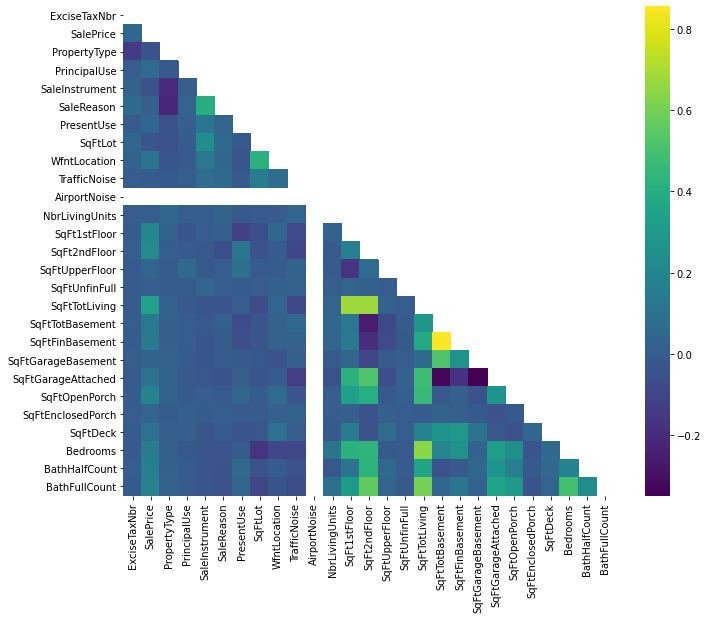

In [395]:
corr = all_totliving_sqft.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [493]:
middle_class_filtered.corr()

,ExciseTaxNbr,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
ExciseTaxNbr,1.000000,0.002200,-0.185933,NaN,0.026418,0.052894,-0.014675,0.024138,0.011442,-0.005973,NaN,NaN,0.004337,0.003575,-0.009181,0.000396,0.002294,0.004980,-0.006174,0.007747,-0.005747,-0.004004,0.005938,-0.004591,-0.009631,0.000931,-0.004089
SalePrice,0.002200,1.000000,0.038990,NaN,-0.136621,-0.123918,-0.036485,-0.032125,0.030297,-0.012506,NaN,NaN,0.315819,0.387421,0.087426,-0.004521,0.586434,0.208416,0.218854,0.063213,0.166693,0.262499,0.005154,0.189110,0.296510,0.184946,0.330511
PropertyType,-0.185933,0.038990,1.000000,NaN,-0.267901,-0.303592,-0.006898,-0.028481,-0.019014,-0.017556,NaN,NaN,0.012057,-0.019168,0.006283,-0.011319,0.000473,0.009261,0.016811,0.014079,0.020527,-0.011325,-0.004083,0.019102,0.009030,0.018874,0.004979
PrincipalUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleInstrument,0.026418,-0.136621,-0.267901,NaN,1.000000,0.468255,-0.043235,0.123360,0.046934,0.016807,NaN,NaN,0.018034,-0.024972,-0.023821,0.023067,-0.013853,0.008304,-0.005401,-0.011926,-0.021655,-0.009938,-0.007705,-0.034643,-0.002836,-0.038217,-0.019040
SaleReason,0.052894,-0.123918,-0.303592,NaN,0.468255,1.000000,-0.042127,0.094962,0.039163,0.040215,NaN,NaN,0.019126,-0.087933,-0.021723,0.010084,-0.047251,0.038491,0.014113,0.003386,-0.049659,-0.025146,0.002373,-0.005337,-0.033006,-0.045370,-0.063652
PresentUse,-0.014675,-0.036485,-0.006898,NaN,-0.043235,-0.042127,1.000000,-0.016382,-0.034419,0.085497,NaN,NaN,-0.451598,0.006553,0.313168,-0.009393,-0.237372,-0.052242,-0.046859,0.092864,-0.249006,-0.138720,0.030299,0.079758,-0.258696,0.091125,-0.071750
SqFtLot,0.024138,-0.032125,-0.028481,NaN,0.123360,0.094962,-0.016382,1.000000,0.238590,0.067361,NaN,NaN,-0.009005,-0.016230,-0.007463,0.004445,-0.021742,-0.015186,-0.012602,-0.011873,-0.008835,0.008027,-0.000248,-0.002422,-0.075218,-0.016096,-0.042608
WfntLocation,0.011442,0.030297,-0.019014,NaN,0.046934,0.039163,-0.034419,0.238590,1.000000,0.007217,NaN,NaN,0.037173,-0.026400,-0.015349,-0.003090,0.006583,0.003454,0.007000,-0.035506,-0.008890,0.048762,0.013148,0.083904,-0.063304,-0.014827,-0.031038
TrafficNoise,-0.005973,-0.012506,-0.017556,NaN,0.016807,0.040215,0.085497,0.067361,0.007217,1.000000,NaN,NaN,-0.086084,-0.095740,0.042666,0.004289,-0.089002,0.055452,0.033176,0.020656,-0.132973,-0.045848,0.026534,0.007285,-0.078235,-0.047755,-0.064879


---

#### we have no airport noise in our data.

In [397]:
all_totliving_sqft.AirportNoise.value_counts()

0.0    29222
Name: AirportNoise, dtype: int64

In [399]:
all_sales_2019_merged.AirportNoise.value_counts()

0.0     33096
59.0       21
60.0        6
64.0        5
63.0        3
61.0        2
62.0        1
65.0        1
Name: AirportNoise, dtype: int64

---

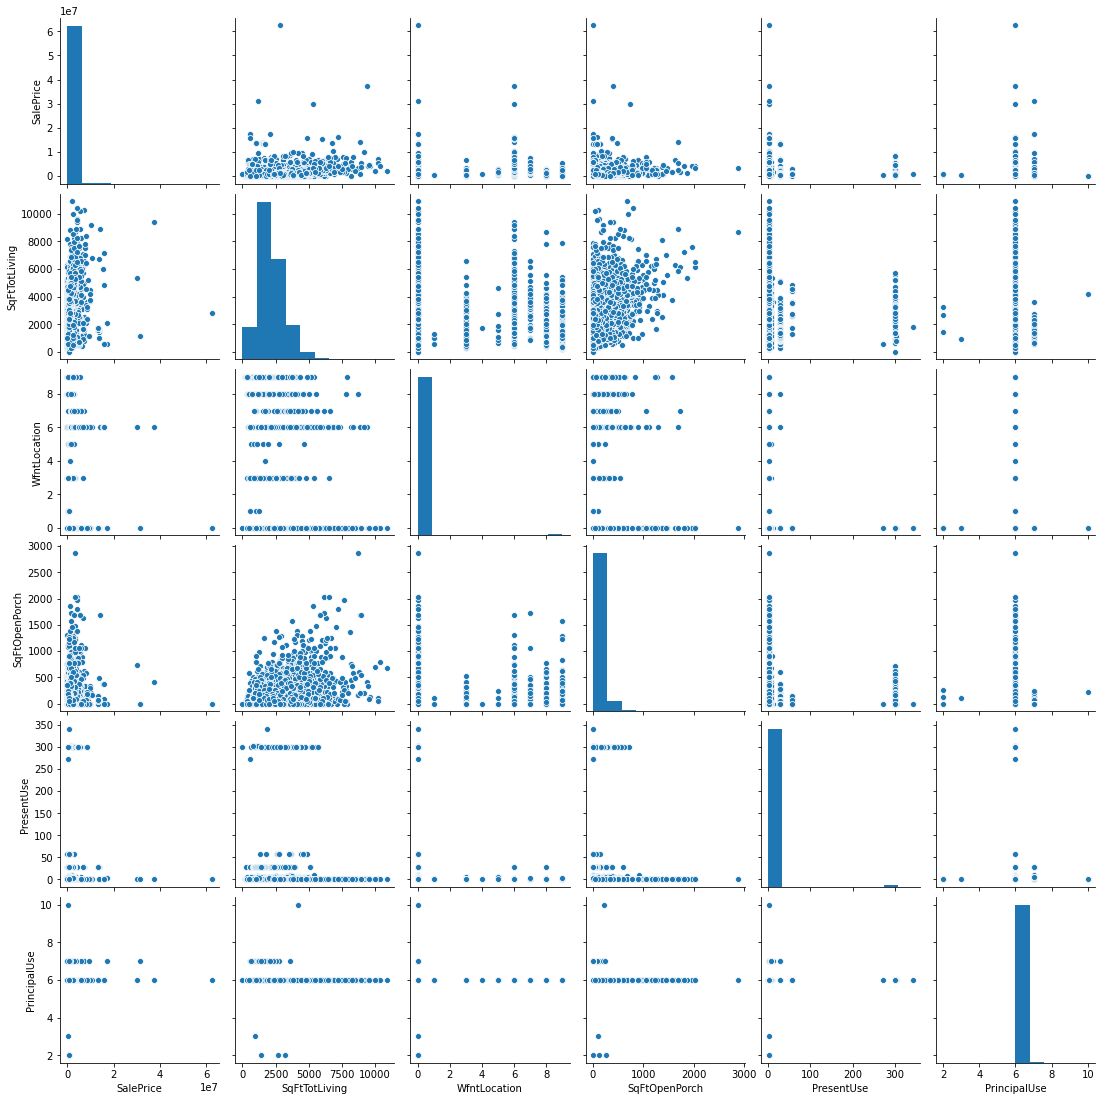

In [401]:
positively_correlated_cols = ['SalePrice','SqFtTotLiving','WfntLocation', 'SqFtOpenPorch', 'PresentUse', 'PrincipalUse']
positively_correlated_df = all_totliving_sqft[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [419]:
all_merge.SalePrice.mean()

602918.3952202459

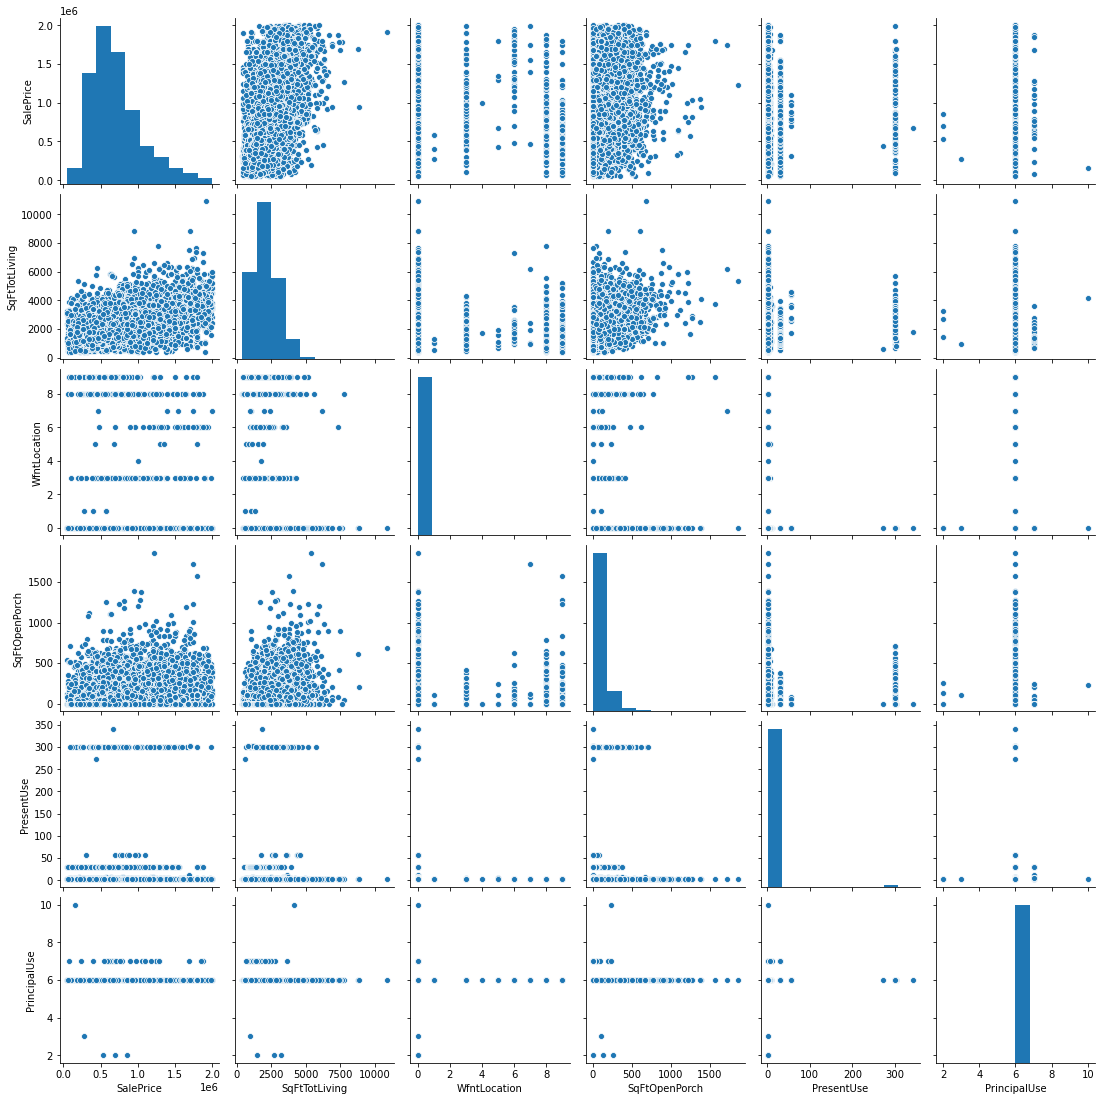

In [415]:
positively_correlated_cols = ['SalePrice','SqFtTotLiving','WfntLocation', 'SqFtOpenPorch', 'PresentUse', 'PrincipalUse']
positively_correlated_df = middle_class[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [445]:
f = 'SalePrice~SqFtTotLiving'
model = ols(formula=f, data=middle_class)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:55:33   Log-Likelihood:            -3.8773e+05
No. Observations:               27718   AIC:                         7.755e+05
Df Residuals:                   27716   BIC:                         7.755e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.452e+05   4474.086     54.811      0.000    2.36e+05    2.54e+05
SqFtTotLiving   222.9896      1.943    114.762      0.000     219.181     226.798
==============================================================================
Omnibus:                     2999.914   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5011.891
Skew:                           0.764   Prob(JB):                         0.00
Kurtosis:                       4.417   Cond. No.                     5.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [491]:
f = 'SalePrice~SqFtTotLiving'
model = ols(formula=f, data=middle_class_filtered)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                 1.383e+04
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:40:59   Log-Likelihood:            -3.6835e+05
No. Observations:               26379   AIC:                         7.367e+05
Df Residuals:                   26377   BIC:                         7.367e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.342e+05   4477.071     52.303      0.000    2.25e+05    2.43e+05
SqFtTotLiving   229.3435      1.950    117.584      0.000     225.520     233.167
==============================================================================
Omnibus:                     2809.063   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4538.125
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       4.333   Cond. No.                     5.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [495]:
middle_class_filtered.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'PropertyType', 'PrincipalUse', 'SaleInstrument', 'AFHistoricProperty',
       'SaleReason', 'PropName', 'PropType', 'PresentUse', 'SqFtLot',
       'WfntLocation', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrLivingUnits', 'ZipCode', 'SqFt1stFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageBasement',
       'SqFtGarageAttached', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'Bedrooms', 'BathHalfCount', 'BathFullCount'],
      dtype='object')

In [497]:
sale_preds = middle_class_filtered[['SqFtTotLiving','SqFtOpenPorch']]

model = sm.OLS(middle_class_filtered.SalePrice, sm.add_constant(sale_preds))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     6925.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:58:11   Log-Likelihood:            -3.6834e+05
No. Observations:               26379   AIC:                         7.367e+05
Df Residuals:                   26376   BIC:                         7.367e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.369e+05   4527.926     52.326      0.000    2.28e+05    2.46e+05
SqFtTotLiving   225.7408      2.145    105.254      0.000     221.537     229.945
SqFtOpenPorch    66.3539     16.450      4.034      0.000      34.112      98.596
==============================================================================
Omnibus:                     2805.070   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4516.647
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       4.324   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [498]:
middle_class_filtered

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495665,3029078,94500,570,2019-12-31,1150000,11,6,3,N,1,,R,2.0,4650.0,0.0,0.0,0.0,N,Y,1.0,NaN,1230.0,980.0,0.0,0.0,2820.0,610.0,610.0,0.0,0.0,0.0,0.0,220.0,4.0,1.0,2.0
1688437,3029386,247335,830,2019-12-31,627000,11,6,3,N,1,,R,2.0,10425.0,0.0,0.0,0.0,N,N,1.0,98058,2530.0,0.0,0.0,0.0,3820.0,0.0,0.0,0.0,420.0,80.0,0.0,0.0,5.0,1.0,1.0
1079169,3029102,712830,190,2019-12-31,346629,3,6,27,N,4,,R,2.0,3000.0,0.0,1.0,0.0,N,N,1.0,98144,780.0,0.0,0.0,0.0,1280.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4.0,1.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


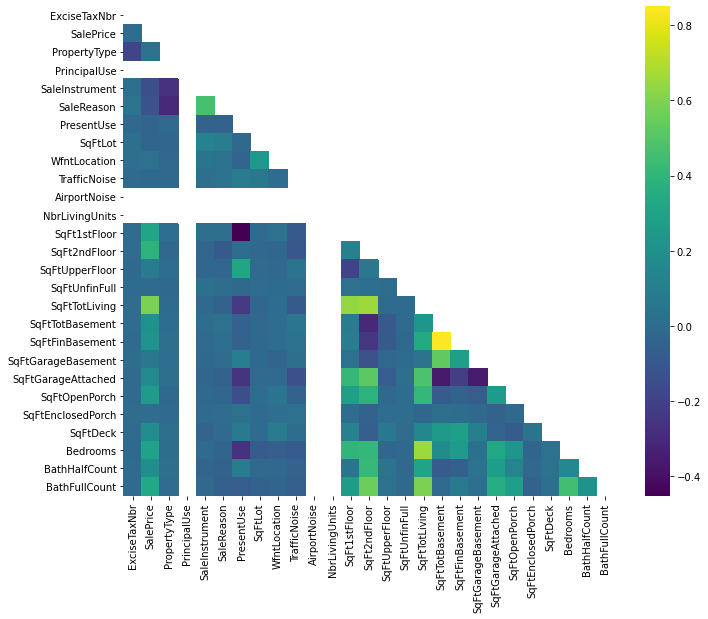

In [499]:
corr = middle_class_filtered.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [500]:
middle_class_filtered.PrincipalUse.value_counts()

6    26379
Name: PrincipalUse, dtype: int64

In [501]:
X = middle_class_filtered.drop('SalePrice', axis=1)

In [504]:
X.corr()

,ExciseTaxNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
ExciseTaxNbr,1.000000,-0.185933,NaN,0.026418,0.052894,-0.014675,0.024138,0.011442,-0.005973,NaN,NaN,0.004337,0.003575,-0.009181,0.000396,0.002294,0.004980,-0.006174,0.007747,-0.005747,-0.004004,0.005938,-0.004591,-0.009631,0.000931,-0.004089
PropertyType,-0.185933,1.000000,NaN,-0.267901,-0.303592,-0.006898,-0.028481,-0.019014,-0.017556,NaN,NaN,0.012057,-0.019168,0.006283,-0.011319,0.000473,0.009261,0.016811,0.014079,0.020527,-0.011325,-0.004083,0.019102,0.009030,0.018874,0.004979
PrincipalUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleInstrument,0.026418,-0.267901,NaN,1.000000,0.468255,-0.043235,0.123360,0.046934,0.016807,NaN,NaN,0.018034,-0.024972,-0.023821,0.023067,-0.013853,0.008304,-0.005401,-0.011926,-0.021655,-0.009938,-0.007705,-0.034643,-0.002836,-0.038217,-0.019040
SaleReason,0.052894,-0.303592,NaN,0.468255,1.000000,-0.042127,0.094962,0.039163,0.040215,NaN,NaN,0.019126,-0.087933,-0.021723,0.010084,-0.047251,0.038491,0.014113,0.003386,-0.049659,-0.025146,0.002373,-0.005337,-0.033006,-0.045370,-0.063652
PresentUse,-0.014675,-0.006898,NaN,-0.043235,-0.042127,1.000000,-0.016382,-0.034419,0.085497,NaN,NaN,-0.451598,0.006553,0.313168,-0.009393,-0.237372,-0.052242,-0.046859,0.092864,-0.249006,-0.138720,0.030299,0.079758,-0.258696,0.091125,-0.071750
SqFtLot,0.024138,-0.028481,NaN,0.123360,0.094962,-0.016382,1.000000,0.238590,0.067361,NaN,NaN,-0.009005,-0.016230,-0.007463,0.004445,-0.021742,-0.015186,-0.012602,-0.011873,-0.008835,0.008027,-0.000248,-0.002422,-0.075218,-0.016096,-0.042608
WfntLocation,0.011442,-0.019014,NaN,0.046934,0.039163,-0.034419,0.238590,1.000000,0.007217,NaN,NaN,0.037173,-0.026400,-0.015349,-0.003090,0.006583,0.003454,0.007000,-0.035506,-0.008890,0.048762,0.013148,0.083904,-0.063304,-0.014827,-0.031038
TrafficNoise,-0.005973,-0.017556,NaN,0.016807,0.040215,0.085497,0.067361,0.007217,1.000000,NaN,NaN,-0.086084,-0.095740,0.042666,0.004289,-0.089002,0.055452,0.033176,0.020656,-0.132973,-0.045848,0.026534,0.007285,-0.078235,-0.047755,-0.064879
AirportNoise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [505]:
middle_class_filtered.corr()

,ExciseTaxNbr,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
ExciseTaxNbr,1.000000,0.002200,-0.185933,NaN,0.026418,0.052894,-0.014675,0.024138,0.011442,-0.005973,NaN,NaN,0.004337,0.003575,-0.009181,0.000396,0.002294,0.004980,-0.006174,0.007747,-0.005747,-0.004004,0.005938,-0.004591,-0.009631,0.000931,-0.004089
SalePrice,0.002200,1.000000,0.038990,NaN,-0.136621,-0.123918,-0.036485,-0.032125,0.030297,-0.012506,NaN,NaN,0.315819,0.387421,0.087426,-0.004521,0.586434,0.208416,0.218854,0.063213,0.166693,0.262499,0.005154,0.189110,0.296510,0.184946,0.330511
PropertyType,-0.185933,0.038990,1.000000,NaN,-0.267901,-0.303592,-0.006898,-0.028481,-0.019014,-0.017556,NaN,NaN,0.012057,-0.019168,0.006283,-0.011319,0.000473,0.009261,0.016811,0.014079,0.020527,-0.011325,-0.004083,0.019102,0.009030,0.018874,0.004979
PrincipalUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleInstrument,0.026418,-0.136621,-0.267901,NaN,1.000000,0.468255,-0.043235,0.123360,0.046934,0.016807,NaN,NaN,0.018034,-0.024972,-0.023821,0.023067,-0.013853,0.008304,-0.005401,-0.011926,-0.021655,-0.009938,-0.007705,-0.034643,-0.002836,-0.038217,-0.019040
SaleReason,0.052894,-0.123918,-0.303592,NaN,0.468255,1.000000,-0.042127,0.094962,0.039163,0.040215,NaN,NaN,0.019126,-0.087933,-0.021723,0.010084,-0.047251,0.038491,0.014113,0.003386,-0.049659,-0.025146,0.002373,-0.005337,-0.033006,-0.045370,-0.063652
PresentUse,-0.014675,-0.036485,-0.006898,NaN,-0.043235,-0.042127,1.000000,-0.016382,-0.034419,0.085497,NaN,NaN,-0.451598,0.006553,0.313168,-0.009393,-0.237372,-0.052242,-0.046859,0.092864,-0.249006,-0.138720,0.030299,0.079758,-0.258696,0.091125,-0.071750
SqFtLot,0.024138,-0.032125,-0.028481,NaN,0.123360,0.094962,-0.016382,1.000000,0.238590,0.067361,NaN,NaN,-0.009005,-0.016230,-0.007463,0.004445,-0.021742,-0.015186,-0.012602,-0.011873,-0.008835,0.008027,-0.000248,-0.002422,-0.075218,-0.016096,-0.042608
WfntLocation,0.011442,0.030297,-0.019014,NaN,0.046934,0.039163,-0.034419,0.238590,1.000000,0.007217,NaN,NaN,0.037173,-0.026400,-0.015349,-0.003090,0.006583,0.003454,0.007000,-0.035506,-0.008890,0.048762,0.013148,0.083904,-0.063304,-0.014827,-0.031038
TrafficNoise,-0.005973,-0.012506,-0.017556,NaN,0.016807,0.040215,0.085497,0.067361,0.007217,1.000000,NaN,NaN,-0.086084,-0.095740,0.042666,0.004289,-0.089002,0.055452,0.033176,0.020656,-0.132973,-0.045848,0.026534,0.007285,-0.078235,-0.047755,-0.064879


In [575]:
middle_class_filtered

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,PropertyType,PrincipalUse,SaleInstrument,AFHistoricProperty,SaleReason,PropName,PropType,PresentUse,SqFtLot,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrLivingUnits,ZipCode,SqFt1stFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,BathFullCount
2055930,2969241,202870,725,2019-01-02,1680000,11,6,3,N,1,,R,2.0,4505.0,0.0,0.0,0.0,N,N,1.0,98117,1530.0,1440.0,0.0,0.0,3730.0,1460.0,760.0,700.0,0.0,210.0,0.0,130.0,5.0,1.0,3.0
1648073,2969790,982870,2467,2019-01-02,1000000,10,6,3,N,1,,R,29.0,1064.0,0.0,0.0,0.0,N,N,1.0,NaN,600.0,600.0,600.0,0.0,1800.0,380.0,0.0,380.0,0.0,0.0,100.0,440.0,3.0,1.0,1.0
1647464,2970942,362991,780,2019-01-02,820000,11,6,3,N,1,Single Family Residence,R,2.0,3244.0,0.0,0.0,0.0,N,N,1.0,98029,1280.0,1060.0,0.0,0.0,2340.0,0.0,0.0,0.0,480.0,40.0,0.0,140.0,3.0,1.0,2.0
1493478,2969761,809990,470,2019-01-02,705000,3,6,3,N,1,,R,2.0,10552.0,0.0,0.0,0.0,N,N,1.0,98075,1390.0,0.0,0.0,0.0,1390.0,0.0,0.0,0.0,570.0,0.0,0.0,410.0,3.0,0.0,1.0
396956,2969692,255590,265,2019-01-02,548000,3,6,3,N,1,,R,2.0,11100.0,0.0,0.0,0.0,Y,N,1.0,98155,1270.0,0.0,0.0,0.0,1560.0,990.0,290.0,0.0,0.0,0.0,0.0,330.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495665,3029078,94500,570,2019-12-31,1150000,11,6,3,N,1,,R,2.0,4650.0,0.0,0.0,0.0,N,Y,1.0,NaN,1230.0,980.0,0.0,0.0,2820.0,610.0,610.0,0.0,0.0,0.0,0.0,220.0,4.0,1.0,2.0
1688437,3029386,247335,830,2019-12-31,627000,11,6,3,N,1,,R,2.0,10425.0,0.0,0.0,0.0,N,N,1.0,98058,2530.0,0.0,0.0,0.0,3820.0,0.0,0.0,0.0,420.0,80.0,0.0,0.0,5.0,1.0,1.0
1079169,3029102,712830,190,2019-12-31,346629,3,6,27,N,4,,R,2.0,3000.0,0.0,1.0,0.0,N,N,1.0,98144,780.0,0.0,0.0,0.0,1280.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,4.0,1.0,1.0
2061020,3029940,951405,600,2019-12-31,921000,11,6,3,N,1,NaN,R,2.0,4197.0,0.0,0.0,0.0,N,N,1.0,NaN,940.0,1340.0,0.0,0.0,2280.0,0.0,0.0,0.0,440.0,110.0,0.0,0.0,3.0,1.0,2.0


In [577]:
sale_preds = middle_class_filtered[['SqFtTotLiving', 'WfntLocation', 'SqFtOpenPorch']]

model = sm.OLS(middle_class_filtered.SalePrice, sm.add_constant(sale_preds))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     4653.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:32:32   Log-Likelihood:            -3.6762e+05
No. Observations:               26332   AIC:                         7.353e+05
Df Residuals:                   26328   BIC:                         7.353e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.34e+05   4538.200     51.562      0.000    2.25e+05    2.43e+05
SqFtTotLiving   226.6687      2.146    105.604      0.000     222.462     230.876
WfntLocation   1.251e+04   2252.158      5.553      0.000    8092.718    1.69e+04
SqFtOpenPorch    60.9591     16.437      3.709      0.000      28.742      93.176
==============================================================================
Omnibus:                     2658.732   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4179.858
Skew:                           0.746   Prob(JB):                         0.00
Kurtosis:                       4.259   Cond. No.                     6.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [578]:
sale_preds = middle_class_filtered[['SqFtTotLiving']]

model = sm.OLS(middle_class_filtered.SalePrice, sm.add_constant(sale_preds))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                 1.389e+04
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:32:57   Log-Likelihood:            -3.6765e+05
No. Observations:               26332   AIC:                         7.353e+05
Df Residuals:                   26330   BIC:                         7.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.321e+05   4486.846     51.719      0.000    2.23e+05    2.41e+05
SqFtTotLiving   230.1587      1.953    117.846      0.000     226.331     233.987
==============================================================================
Omnibus:                     2727.324   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4352.699
Skew:                           0.755   Prob(JB):                         0.00
Kurtosis:                       4.299   Cond. No.                     5.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [616]:
# sale_preds = middle_class_filtered[['SqFtTotLiving']]

model = sm.OLS(test_w_corr_matrix_df.SalePrice, sm.add_constant(test_w_corr_matrix_df))
results = model.fit()

results.summary()

MissingDataError: exog contains inf or nans

In [617]:
model = sm.OLS(all_merge.SalePrice, sm.add_constant(all_merge))
results = model.fit()

results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

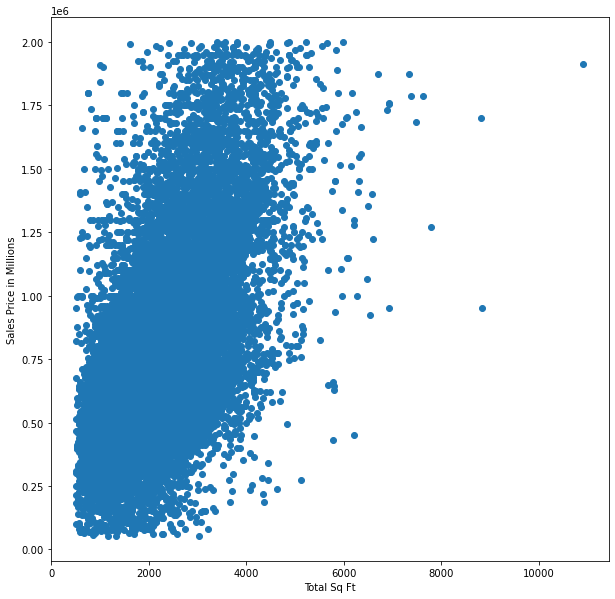

In [566]:
fig, ax = plt.subplots(figsize = (10, 10))

ax = plt.scatter(middle_class_filtered.SqFtTotLiving, middle_class_filtered.SalePrice)

ax = plt.ylabel("Sales Price in Millions")
ax = plt.xlabel("Total Sq Ft")

plt.savefig('Sale Price vs Total Sq Ft')

In [567]:
middle_class_filtered.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'PropertyType', 'PrincipalUse', 'SaleInstrument', 'AFHistoricProperty',
       'SaleReason', 'PropName', 'PropType', 'PresentUse', 'SqFtLot',
       'WfntLocation', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances', 'NbrLivingUnits', 'ZipCode', 'SqFt1stFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageBasement',
       'SqFtGarageAttached', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'Bedrooms', 'BathHalfCount', 'BathFullCount'],
      dtype='object')

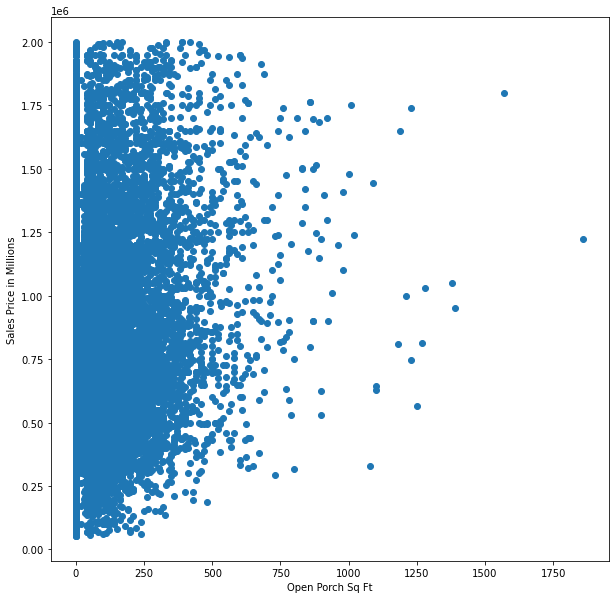

In [570]:
fig, ax = plt.subplots(figsize = (10, 10))

ax = plt.scatter(middle_class_filtered.SqFtOpenPorch, middle_class_filtered.SalePrice)

ax = plt.ylabel("Sales Price in Millions")
ax = plt.xlabel("Open Porch Sq Ft")

plt.savefig('Sale Price vs Open Porch Sq Ft')

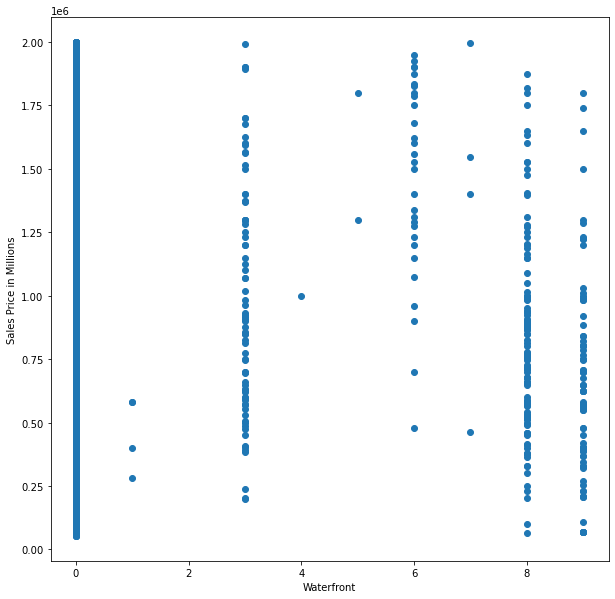

In [571]:
fig, ax = plt.subplots(figsize = (10, 10))

ax = plt.scatter(middle_class_filtered.WfntLocation, middle_class_filtered.SalePrice)

ax = plt.ylabel("Sales Price in Millions")
ax = plt.xlabel("Waterfront")

plt.savefig('Sale Price vs Waterfront')

In [574]:
lookup(50)

,LUType,LUItem,LUDescription
964,50,1,DUWAMISH
965,50,2,ELLIOTT BAY
966,50,3,PUGET SOUND
967,50,4,LAKE UNION
968,50,5,SHIP CANAL
969,50,6,LAKE WASH
970,50,7,LAKE SAMM
971,50,8,OTHER LAKE
972,50,9,RIVER/SLOUGH


In [ ]:
def hscdty_brpa_test (indep, dep, fsm_df, fsm_results):
    
    #Produces visual scatter graph
    y a= fsm_df[f"Predicted {dep}"]
    y_hat = fsm_results.predict()
    fig, ax = plt.subplots()
    ax.set(xlabel=f"{dep}",
        ylabel=f"Residuals (Actual - Predicted {dep})")
    ax.scatter(x=y_hat, y=y-y_hat, color="blue", alpha=0.2);
    
    #Breusch-Pagan Test:
    lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[[f"{indep}"]])
    print("Lagrange Multiplier p-value:", lm_p_value)
    print("F-statistic p-value:", f_p_value) 